<a href="https://colab.research.google.com/github/JUNHONGKIM95/MLP_Group14/blob/main/20210604_UNet_multi_class_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Modules

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/models")
sys.path.append("/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master")
from UNet import *

import matplotlib.pyplot as plt
import numpy as np
import os
import time
from keras.models import load_model
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.callbacks import ReduceLROnPlateau, CSVLogger
import keras.backend as K
import cv2
import PIL

# Load Data

In [ ]:
#x_train = np.load('/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/dataset/x_256_lung_liver_train.npy')
#y_train = np.load('/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/dataset/y_256_lung_liver_train.npy')
#x_val = np.load('/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/dataset/x_256_lung_liver_val.npy')
#y_val = np.load('/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/dataset/y_256_lung_liver_val.npy')
x_test = np.load('/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/dataset/x_256_lung_liver_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/dataset/y_256_lung_liver_test.npy')

#print(x_train.shape, y_train.shape)
#print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2615, 256, 256, 1) (2615, 256, 256, 3)


# Model configuration (U-Net)

In [ ]:
seg_model = UNet(img_shape = x_train[0].shape, num_of_class = 3,learning_rate = 2e-4, do_batch_norm= True, do_drop = True, drop_rate = 0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

# Train Model

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/result")
csv_logger = CSVLogger('20210603_1_csv_logger.log') # history save as CSV file

history = seg_model.train(x_train, y_train, validation_data=(x_val, y_val), epoch = 50, batch_size = 32, callbacks=[csv_logger])

Epoch 1/50
116/116 [==============================] - 294s 2s/step - loss: 85.1250 - acc: 0.9369 - mse: 0.4116 - val_loss: 6.1761 - val_acc: 0.9595 - val_mse: 0.3391
Epoch 2/50
116/116 [==============================] - 205s 2s/step - loss: 1.4311 - acc: 0.9466 - mse: 0.3427 - val_loss: 0.5281 - val_acc: 0.9610 - val_mse: 0.3406
Epoch 3/50
116/116 [==============================] - 204s 2s/step - loss: 0.3693 - acc: 0.9502 - mse: 0.3442 - val_loss: 0.2711 - val_acc: 0.9684 - val_mse: 0.3380
Epoch 4/50
116/116 [==============================] - 205s 2s/step - loss: 0.2571 - acc: 0.9581 - mse: 0.3373 - val_loss: 0.2049 - val_acc: 0.9724 - val_mse: 0.3284
Epoch 5/50
116/116 [==============================] - 204s 2s/step - loss: 0.1813 - acc: 0.9639 - mse: 0.3241 - val_loss: 0.1780 - val_acc: 0.9723 - val_mse: 0.3179
Epoch 6/50
116/116 [==============================] - 204s 2s/step - loss: 0.1496 - acc: 0.9647 - mse: 0.3113 - val_loss: 0.1689 - val_acc: 0.9737 - val_mse: 0.3108
Epoch 7/5

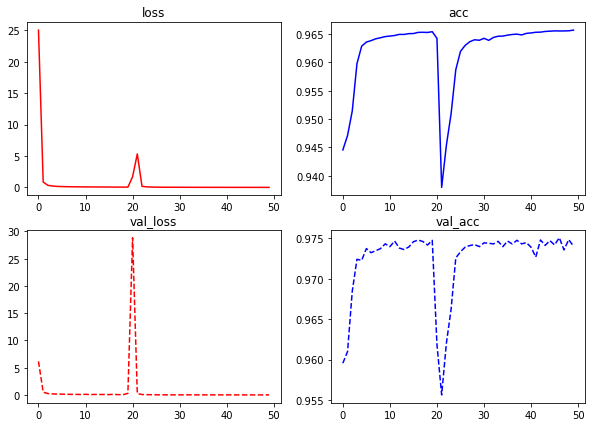

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

# Save model

In [ ]:
datapath = "/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/trained_model"

os.chdir(datapath)
seg_model.save('U_Net_lung_20210603_256x256_lung_liver.h5')

# Load model

In [ ]:
datapath = '/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/trained_model'
os.chdir(datapath)

seg_model = load_model('U_Net_lung_20210603_256x256_lung_liver.h5')

# Show result

In [ ]:
preds = seg_model.predict(x_test)

14157
3087
14432
2647
14860
2363
15197
1849
15606
1401
15940
723
16317
427
16710
171
17059
172
17475
179


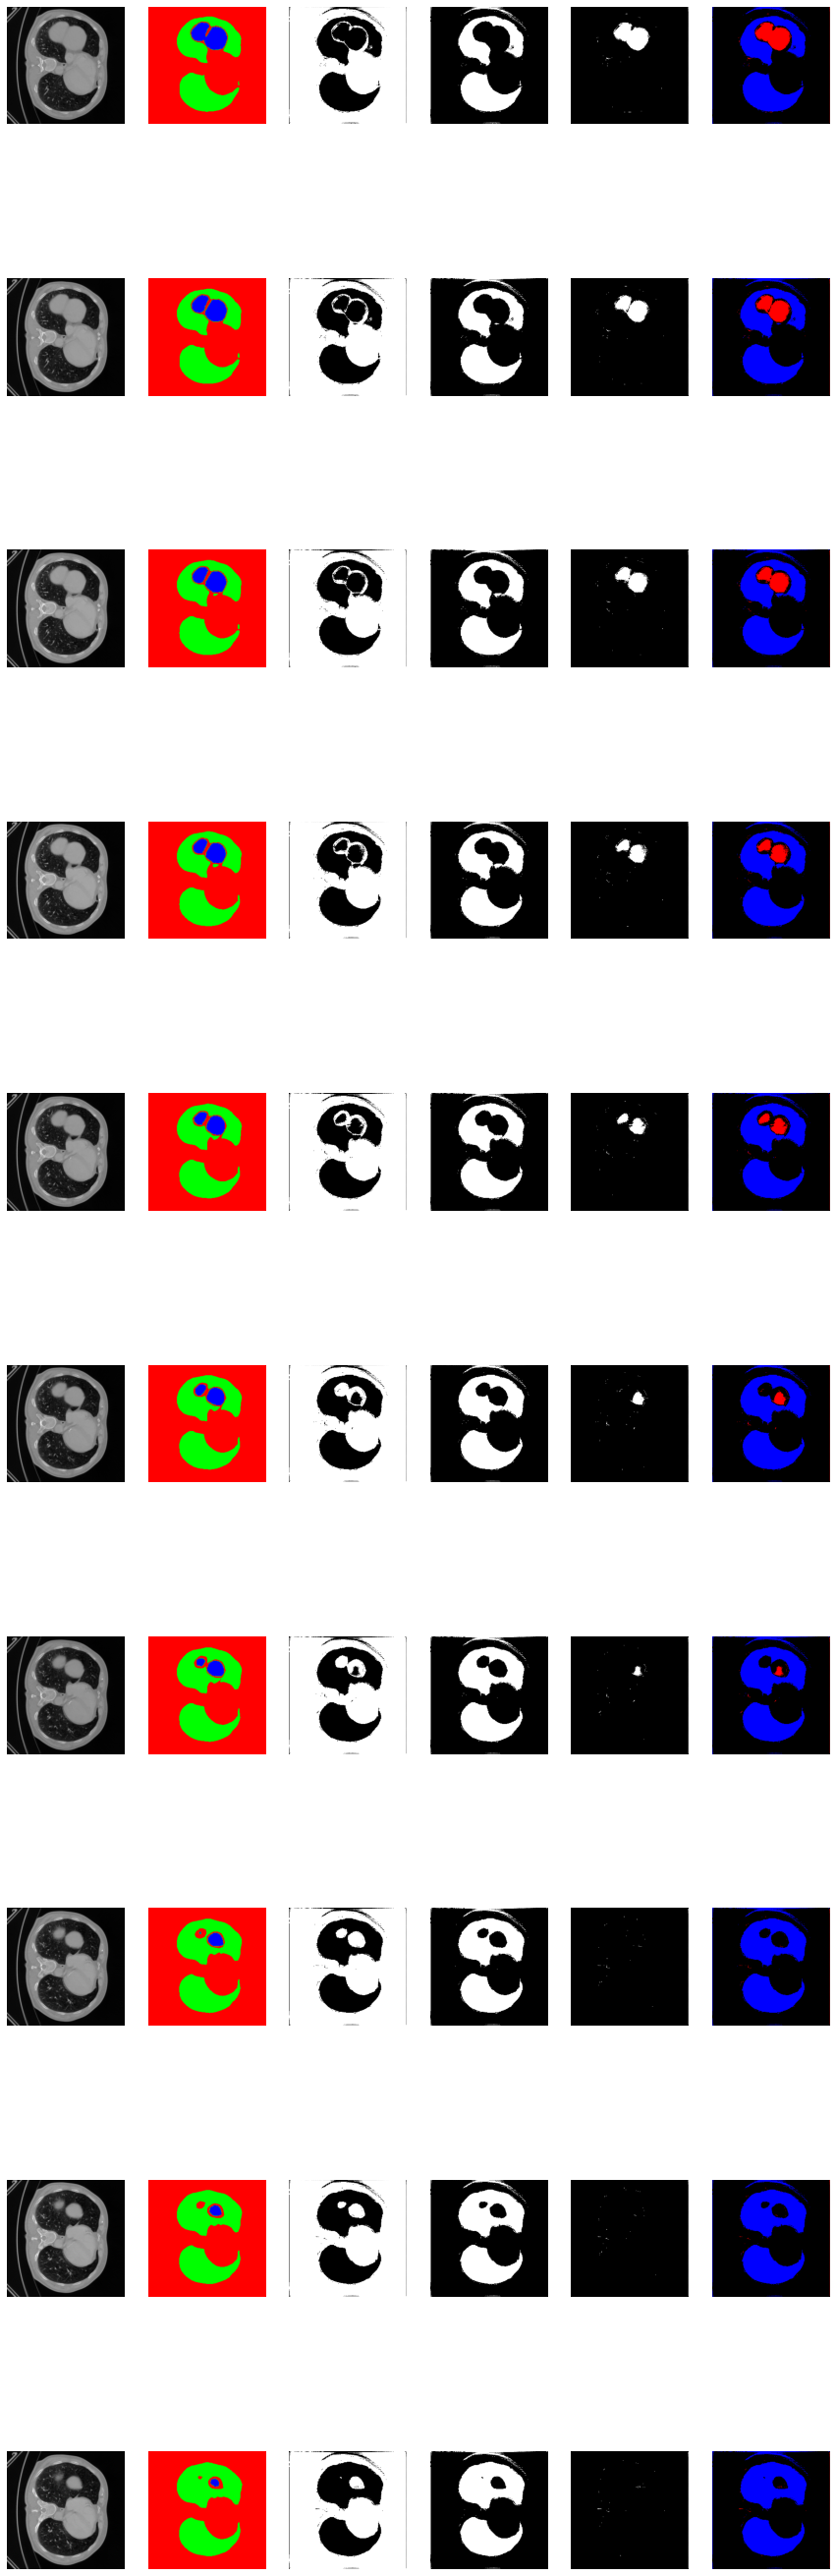

In [ ]:
start_num = 2416

show_num = 10
fig, ax = plt.subplots(show_num, 6, figsize=(15, 50))

for i, pred in enumerate(preds[start_num:start_num+show_num]):

    ax[i, 0].imshow(x_test[start_num+i].squeeze(), cmap='gray')
    ax[i, 0].axis('off')

    y_test_ = np.where(y_test[start_num+i].squeeze()>0., 1.0, 0.0)
    ax[i, 1].imshow(y_test_)
    ax[i, 1].axis('off')


    back, lung, liver = cv2.split(pred)

    back_ = np.where(back>lung, back, 0.0)
    back__ = np.where(back_>liver, back_, 0.0)
    back_correct = np.where(back__!=0, 1.0, 0.0)

    lung_ = np.where(lung>=back, lung, 0.0)
    lung__ = np.where(lung_>=liver, lung_, 0.0)
    lung_correct = np.where(lung__!=0, 1.0, 0.0)
    cnt_lung = cv2.countNonZero(lung_correct)
    print(cnt_lung)

    liver_ = np.where(liver>=back, liver, 0.0)
    liver__ = np.where(liver_>lung, liver_, 0.0)
    liver_correct = np.where(liver__!=0, 1.0, 0.0)
    cnt_liver = cv2.countNonZero(liver_correct)
    print(cnt_liver)


    dummy_test = cv2.merge((liver_correct, back_correct, lung_correct))
    dummy_test = np.where(dummy_test[:,:]==(0,1,0), (0,0,0), dummy_test[:,:])






    ax[i, 2].imshow(back_correct, cmap = 'gray')
    ax[i, 2].axis('off')
    ax[i, 3].imshow(lung_correct, cmap = 'gray')
    ax[i, 3].axis('off')
    ax[i, 4].imshow(liver_correct, cmap = 'gray')
    ax[i, 4].axis('off')
    ax[i, 5].imshow(dummy_test)
    ax[i, 5].axis('off')

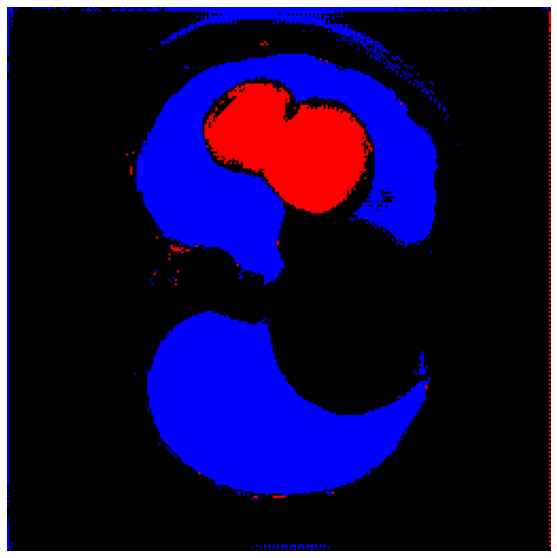

In [ ]:
start_num = 2416

show_num = 1
fig, ax = plt.subplots(figsize=(10, 10))

for i, pred in enumerate(preds[start_num:start_num+show_num]):


    y_test_ = np.where(y_test[start_num+i].squeeze()>0., 1.0, 0.0)


    back, lung, liver = cv2.split(pred)

    back_ = np.where(back>lung, back, 0.0)
    back__ = np.where(back_>liver, back_, 0.0)
    back_correct = np.where(back__!=0, 1.0, 0.0)

    lung_ = np.where(lung>=back, lung, 0.0)
    lung__ = np.where(lung_>=liver, lung_, 0.0)
    lung_correct = np.where(lung__!=0, 1.0, 0.0)

    liver_ = np.where(liver>=back, liver, 0.0)
    liver__ = np.where(liver_>lung, liver_, 0.0)
    liver_correct = np.where(liver__!=0, 1.0, 0.0)


    dummy_test = cv2.merge((liver_correct, back_correct, lung_correct))
    dummy_test = np.where(dummy_test[:,:]==(0,1,0), (0,0,0), dummy_test[:,:])


    ax.imshow(dummy_test)
    ax.axis('off')

# Evaluation

In [ ]:
def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)

    intersection = K.sum(y_true * y_pred)

    return (2. * intersection + K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())

In [ ]:
def mIOU(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)

    intersection = K.sum(y_true * y_pred)

    return (intersection + K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon() - intersection)

In [ ]:
test_cnts = len(preds)
lung_result_sum = 0
liver_result_sum = 0
patinet_cnt = 0

y_true_lung_lst = []
y_true_liver_lst = []
y_pred_lung_lst = []
y_pred_liver_lst = []
lung_result_sum = 0
liver_result_sum = 0
lung_IOU_result_sum = 0
liver_IOU_result_sum = 0


os.chdir("/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/result")
path = "/content/drive/MyDrive/Colab Notebooks/2021-1_MLP/Project/U-Net_CT-Image-Segmentation-master/result"
f = open("%s/%s_%d_%s_evaluation_dice.txt"%(path, "20210604", 256, 'lung_liver'),'w')

for i in range(test_cnts):
    y_true_back, y_true_lung, y_true_liver = cv2.split(y_test[i])
    y_true_lung = np.where(y_true_lung>=0.5, 1.0, 0.0)
    y_true_liver = np.where(y_true_liver>=0.5, 1.0, 0.0)

    y_true_lung_lst.append(y_true_lung)
    y_true_liver_lst.append(y_true_liver)

    back, lung, liver = cv2.split(preds[i])

    back_ = np.where(back>lung, back, 0.0)
    back__ = np.where(back_>liver, back_, 0.0)
    y_pred_back = np.where(back__!=0, 1.0, 0.0)

    lung_ = np.where(lung>=back, lung, 0.0)
    lung__ = np.where(lung_>=liver, lung_, 0.0)
    y_pred_lung = np.where(lung__!=0, 1.0, 0.0)

    liver_ = np.where(liver>=back, liver, 0.0)
    liver__ = np.where(liver_>lung, liver_, 0.0)
    y_pred_liver = np.where(liver__!=0, 1.0, 0.0)

    y_pred_lung_lst.append(y_pred_lung)
    y_pred_liver_lst.append(y_pred_liver)

    if(i==500 or i==966 or i==1421 or i==2026 or i==2614):
        patinet_cnt += 1

        lung_result_ = dice_coef(y_true_lung_lst, y_pred_lung_lst)
        liver_result_ = dice_coef(y_true_liver_lst, y_pred_liver_lst)
        lung_result_IOU = mIOU(y_true_lung_lst, y_pred_lung_lst)
        liver_result_IOU = mIOU(y_true_liver_lst, y_pred_liver_lst)

        print("%d th patient : lung DSC = %f, lung mIOU = %f, liver DSC = %f, liver mIOU = %f"%(patinet_cnt, lung_result_, lung_result_IOU, liver_result_, liver_result_IOU))
        f.write("%d th patient : lung DSC = %f, lung mIOU = %f, liver DSC = %f, liver mIOU = %f\n"%(patinet_cnt, lung_result_, lung_result_IOU, liver_result_, liver_result_IOU))

        lung_result_sum += lung_result_
        liver_result_sum += liver_result_
        lung_IOU_result_sum += lung_result_IOU
        liver_IOU_result_sum += liver_result_IOU

        y_true_lung_lst = []
        y_true_liver_lst = []
        y_pred_lung_lst = []
        y_pred_liver_lst = []


lung_result_avg = lung_result_sum/patinet_cnt
liver_result_avg = liver_result_sum/patinet_cnt
lung_IOU_result_avg = lung_IOU_result_sum/patinet_cnt
liver_IOU_result_avg = liver_IOU_result_sum/patinet_cnt


print("All patients : Avg lung DSC = %f, Avg lung mIOU = %f, Avg liver DSC = %f, Avg liver mIOU = %f"%(lung_result_avg, lung_IOU_result_avg, liver_result_avg, liver_IOU_result_avg))
f.write("All patients : Avg lung DSC = %f, Avg lung mIOU = %f, Avg liver DSC = %f, Avg liver mIOU = %f\n"%(lung_result_avg, lung_IOU_result_avg, liver_result_avg, liver_IOU_result_avg))


f.close()

1 th patient : lung DSC = 0.791873, lung mIOU = 0.655455, liver DSC = 0.869199, liver mIOU = 0.768658
2 th patient : lung DSC = 0.843133, lung mIOU = 0.728807, liver DSC = 0.855867, liver mIOU = 0.748049
3 th patient : lung DSC = 0.850758, lung mIOU = 0.740277, liver DSC = 0.789346, liver mIOU = 0.652000
4 th patient : lung DSC = 0.778319, lung mIOU = 0.637088, liver DSC = 0.693938, liver mIOU = 0.531321
5 th patient : lung DSC = 0.860904, lung mIOU = 0.755779, liver DSC = 0.854609, liver mIOU = 0.746129
All patients : Avg lung DSC = 0.824997, Avg lung mIOU = 0.703481, Avg liver DSC = 0.812592, Avg liver mIOU = 0.689231
